#  Data Analysis of Beer

## Project Description



## Table of  Contents

- Part 1 Pre-model Analysis
  - 1.1 Data set overview
  - 1.2 Target feature processing and visualization
  
  
- Part 2 Data Analysis Engineering
  - 2.1 Feature processing and visualization

  
- Part 3 Model Development
  - 3.1 Model development and performance evaluation
  - 3.2 Model prediction


- Part 4 Project Summary

In [4]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os

# !pip install wordcloud
# !pip install stop_words
# !pip install spacy
# !pip install vaderSentiment 
# !pip install nltk

from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import RegexpTokenizer
# from nltk.corpus.stop_words import get_stop_words
import re
import spacy

from vaderSentiment import vaderSentiment
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Part 1. Pre-model Analysis

## 1.1 Data set overview

In [5]:
# Loding the data
beer_raw = pd.read_csv('BeerDataScienceProject.csv')
beer_raw.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [6]:
# Data Information, including shape and type
beer_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


In [7]:
# define a function for checking the missing percentage of each column
def calculate_missing_perc(x):
    '''
    function: check the percentage of missing value of each column in a dataframe
    input: dataframe
    output: dictionary
    '''
    dic = {}
    for feature in x.columns:
        perc = round(x[feature].isnull().sum()/len(x)*100, 2)
        dic[feature] = str(perc) + '%'
    
    return dic

missing_perc = calculate_missing_perc(beer_raw)
missing_perc

{'beer_ABV': '3.83%',
 'beer_beerId': '0.0%',
 'beer_brewerId': '0.0%',
 'beer_name': '0.0%',
 'beer_style': '0.0%',
 'review_appearance': '0.0%',
 'review_palette': '0.0%',
 'review_overall': '0.0%',
 'review_taste': '0.0%',
 'review_profileName': '0.02%',
 'review_aroma': '0.0%',
 'review_text': '0.02%',
 'review_time': '0.0%'}

In [8]:
# Check if the dataset contains duplicate observation; 
# if true, consider to remove the duplicates.
beer_raw.duplicated().any()

False

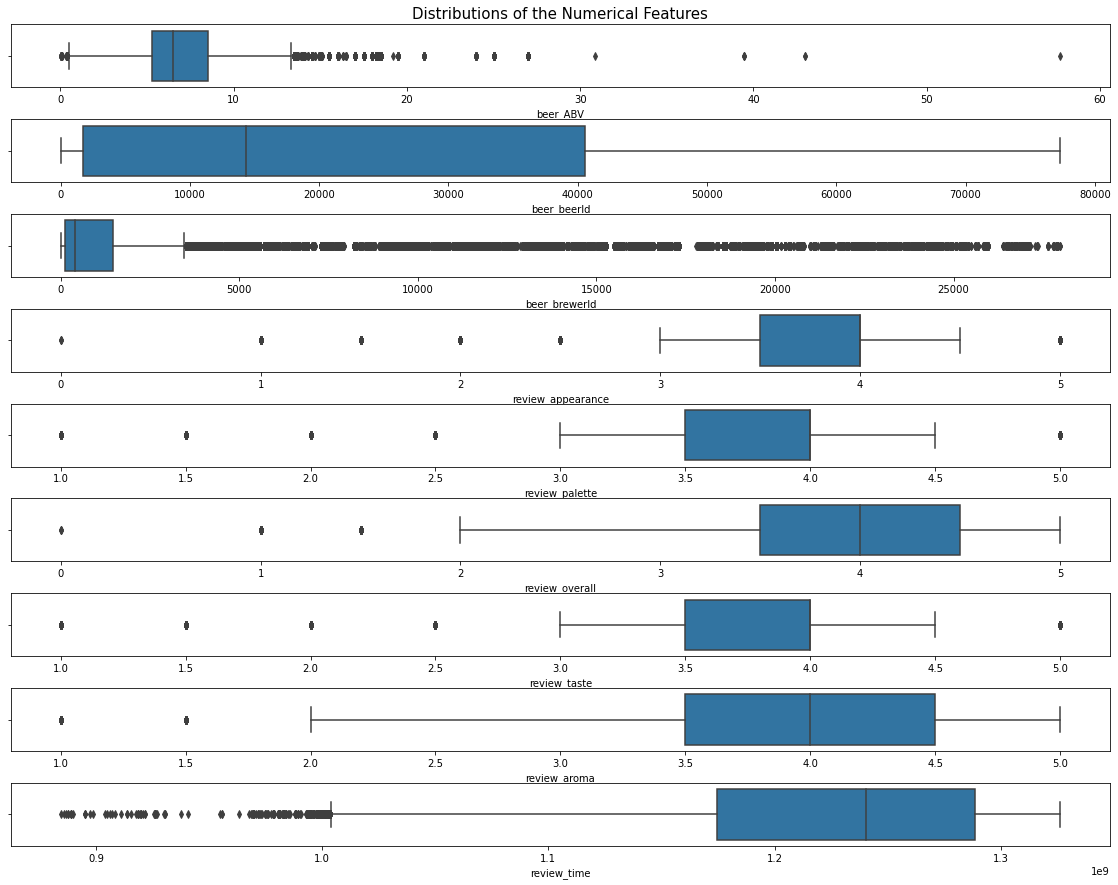

In [16]:
#Target features
num_features = beer_raw.columns.drop(['beer_name', 'beer_style', 'review_profileName', 'review_text'])

# Plot the box plots of prediction results of all models
fig, ax = plt.subplots(nrows=len(num_features), ncols=1, figsize=(16,12))
fig.tight_layout()
                       
for n in range(len(num_features)):
    sns.boxplot(ax = ax[n], x=beer_raw[num_features[n]])

ax[0].set_title('Distributions of the Numerical Features', fontsize=15)

plt.show()

[Text(0.5, 1.0, 'Frequency table of overall review')]

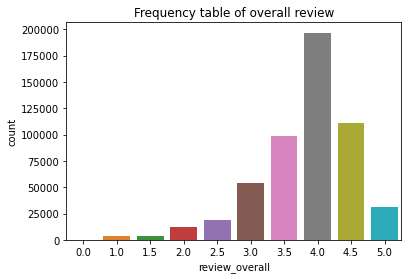

In [20]:
# Get a frequency plot for data distribution.
ax = sns.countplot(x='review_overall', data=beer_raw)
ax.set(title='Frequency table of overall review')
# sns.despine(left=True, bottom=True)

**Part Summary**
- There are 528870 entires with 13 features in the data set.

- A minimal fraction of missing values (3.83%, 0.02%, 0.02%) were observed for `beer_ABV`, `review_profileName` and `review_text`, respectively. 

- Though the information is important, since their portions are small, it is decided to be removed as imputation may bring bias to the model.

- There are no duplicate record in the `BeerDataScienceProject.csv`.

- There are outliers statistically but it is not confident to remove these outliers thereby kept. 

- Ratings for `review_palette` and `review_overall` is range of 0-5, while it is 0-5 for `review_palette`, `review_taste` and `review_aroma`

# Questions

## Q1. Rank top 3 Breweries which produce the strongest beers?

Top 3 strongest beers by their ABV value are: ['Schorschbr�u Schorschbock 57%', 'Schorschbr�u Schorschbock 43%', 'Schorschbr�u Schorschbock 43%']
 
Top 3 breweries producing the strongest beers by their mean ABV value have brewerIDs: ['6513', '736', '24215']


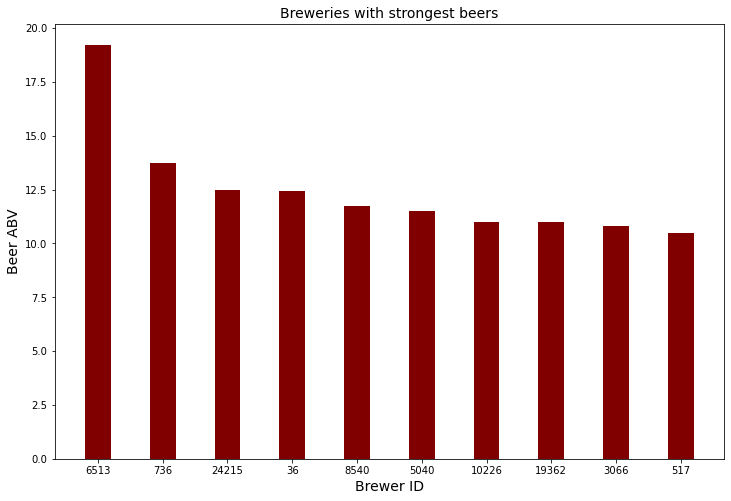

In [15]:
dat.beer_brewerId = dat.beer_brewerId.astype('str')

dat_abv = dat[['beer_brewerId','beer_name','beer_ABV']]

strongest_beers = dat_abv.sort_values(by = 'beer_ABV',ascending = False)      # Sorting of data by values.
strongest_beers =  strongest_beers.dropna()          # Removing NAs, as these are very few in number.
print('Top 3 strongest beers by their ABV value are:', list(strongest_beers.beer_name[0:3]))
print(' ')

# Sort by values and find mean of numeric variables.
strongest_breweries = strongest_beers.groupby('beer_brewerId', as_index=False)['beer_ABV'].mean().sort_values(by = 'beer_ABV',ascending = False)
print('Top 3 breweries producing the strongest beers by their mean ABV value have brewerIDs:', list(strongest_breweries.beer_brewerId[0:3]))

# Plot a bar graph.
strongest_breweries10 = strongest_breweries.head(10)
fig = plt.figure(figsize = (12, 8))  
plt.bar(strongest_breweries10.beer_brewerId, strongest_breweries10.beer_ABV, color ='maroon',  
        width = 0.4) 
plt.xlabel('Brewer ID',fontsize=14) 
plt.ylabel('Beer ABV',fontsize=14) 
plt.title('Breweries with strongest beers',fontsize=14) 
plt.show() 

In [16]:
strongest_breweries.head()

,beer_brewerId,beer_ABV
1338,6513,19.228824
1412,736,13.750000
786,24215,12.466667
1064,36,12.445860
1493,8540,11.750000


# Q2. Which year did beers enjoy the highest ratings?

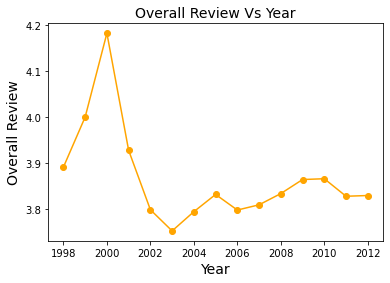

 
Beers enjoyed overall highest ratings in the year: 2000


In [17]:
# Converting to datetime.
dat['review_time'] = pd.to_datetime(dat['review_time'], unit='s')
highest_ratings = dat[['review_time','review_overall']]
highest_ratings['year'] = pd.DatetimeIndex(highest_ratings['review_time']).year # Extracting year from datetime.
highest_ratings = highest_ratings.dropna()
highest_ratings['year'] = highest_ratings['year'].astype('int')

highest_ratings_yearwise = highest_ratings.groupby('year', as_index=False)['review_overall'].mean().sort_values(by = 'year',ascending = False)
plt.plot(highest_ratings_yearwise['year'], highest_ratings_yearwise['review_overall'], color='orange', marker='o')
plt.title('Overall Review Vs Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Overall Review', fontsize=14)
plt.show()
print(' ')

highest_ratings_yearwise = highest_ratings.groupby('year', as_index=False)['review_overall'].mean().sort_values(by = 'review_overall',ascending = False)
highest_ratings_yearwise = highest_ratings_yearwise.reset_index(drop=True)
print('Beers enjoyed overall highest ratings in the year:', highest_ratings_yearwise.year[0])

# Q3. Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?

In [18]:
factors = dat[['review_appearance','review_palette','review_overall','review_aroma','review_taste']]

for i in factors.columns:
    # As we have string values in the float variables.
    factors[i] = pd.to_numeric(factors[i], 'coerce').pipe(lambda s: s.fillna(s.mean()))  
    factors[i] = factors[i].astype(float)
    Correlation = factors['review_overall'].corr(factors[i],'spearman')
    print('Correlation of',i,'with the overall review is',Correlation)
print(' ')

factors.corr('spearman')          # Plotting a spearman corr plot.

Correlation of review_appearance with the overall review is 0.44573065770957737
Correlation of review_palette with the overall review is 0.5461799241134008
Correlation of review_overall with the overall review is 0.9999999999999998
Correlation of review_aroma with the overall review is 0.7221443511318759
Correlation of review_taste with the overall review is 0.6445550410221936
 


,review_appearance,review_palette,review_overall,review_aroma,review_taste
review_appearance,1.000000,0.490674,0.445731,0.487259,0.508758
review_palette,0.490674,1.000000,0.546180,0.661632,0.555853
review_overall,0.445731,0.546180,1.000000,0.722144,0.644555
review_aroma,0.487259,0.661632,0.722144,1.000000,0.680268
review_taste,0.508758,0.555853,0.644555,0.680268,1.000000


# Q4. If you were to recommend 3 beers to your friends based on this data which ones will you recommend?

In [19]:
reccomendation = dat[['beer_name','beer_style','review_overall']]

reccomendation_rev = reccomendation.groupby('beer_name', as_index=False)['review_overall'].mean().sort_values(by = 'review_overall',ascending = False)
print('Three Most recommended bear by mean overall rating are:', list(reccomendation_rev.beer_name[0:3]))
print(' ')

reccomendation_rev_style = reccomendation.groupby(['beer_name','beer_style'], as_index=False)['review_overall'].mean().sort_values(by = 'review_overall',ascending = False)
reccomendation_rev_style = reccomendation_rev_style.reset_index(drop=True)
for i in range(3):
    print('If you love',reccomendation_rev_style.beer_style[i],', you should try',reccomendation_rev_style.beer_name[i])
print(' ')

# Getting review counts for beers.
recommendation_rev_counts = reccomendation[['beer_name','review_overall']].pivot_table(index='beer_name', aggfunc=('count','mean')).dropna()
recommendation_rev_counts.columns = recommendation_rev_counts.columns.to_series().str.join('_')
recommendation_rev_counts = recommendation_rev_counts.query('review_overall_count >= 1000').sort_values('review_overall_mean', ascending=False).head(3)
recommendation_rev_counts.reset_index(level=0, inplace=True)
recommendation_rev_counts = recommendation_rev_counts.reset_index(drop=True)

for i in range(3):
    if i == 0:
        print('Beer with the highest number of reviews is,',recommendation_rev_counts.beer_name[i],',with a mean overall review of,',recommendation_rev_counts.review_overall_mean[i])
    elif i == 1:
        print('Beer with the second highest number of reviews is,',recommendation_rev_counts.beer_name[i],',with a mean overall review of,',recommendation_rev_counts.review_overall_mean[i])
    else:
        print('Beer with the third highest number of reviews is,',recommendation_rev_counts.beer_name[i],',with a mean overall review of,',recommendation_rev_counts.review_overall_mean[i])

Three Most recommended bear by mean overall rating are: ['Dark Funk', "L'Antidote", 'Pike Old 89 Nitro Brown']
 
If you love American Double / Imperial Pilsner , you should try Bubba Imperial Pilsner
If you love English Pale Ale , you should try Seven Hop Session
If you love Bock , you should try Hartmann Bockbier
 
Beer with the highest number of reviews is, Founders KBS (Kentucky Breakfast Stout) ,with a mean overall review of, 4.39751552795031
Beer with the second highest number of reviews is, Tr�egs Nugget Nectar ,with a mean overall review of, 4.395652173913043
Beer with the third highest number of reviews is, Founders Breakfast Stout ,with a mean overall review of, 4.354516386890488


In [20]:
reccomendation_rev_style.head(3)

,beer_name,beer_style,review_overall
0,Bubba Imperial Pilsner,American Double / Imperial Pilsner,5.0
1,Seven Hop Session,English Pale Ale,5.0
2,Hartmann Bockbier,Bock,5.0


# Generating sentiment score

In [21]:

revs = dat[['beer_style','review_overall','review_text']]
revs = revs.dropna()
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+|@[^\s]+')
    return url_pattern.sub(r'', text)
revs['review_textclean'] = revs['review_text'].apply(lambda text: remove_urls(text))   # Remove URLs from the text data.

sent_analyser = SentimentIntensityAnalyzer()
def sentiment(text):
    return (sent_analyser.polarity_scores(text)['compound'])         # Generates a polarity score.

revs['Sentiment_Score'] = revs['review_textclean'].apply(sentiment)   # The polarity score is named as sentiment score.

# Q5. Which Beer style seems to be the favorite based on reviews written by users?

Top 3 beer styles by customer reviews are: ['Quadrupel (Quad)', 'Eisbock', 'Flanders Red Ale']
 


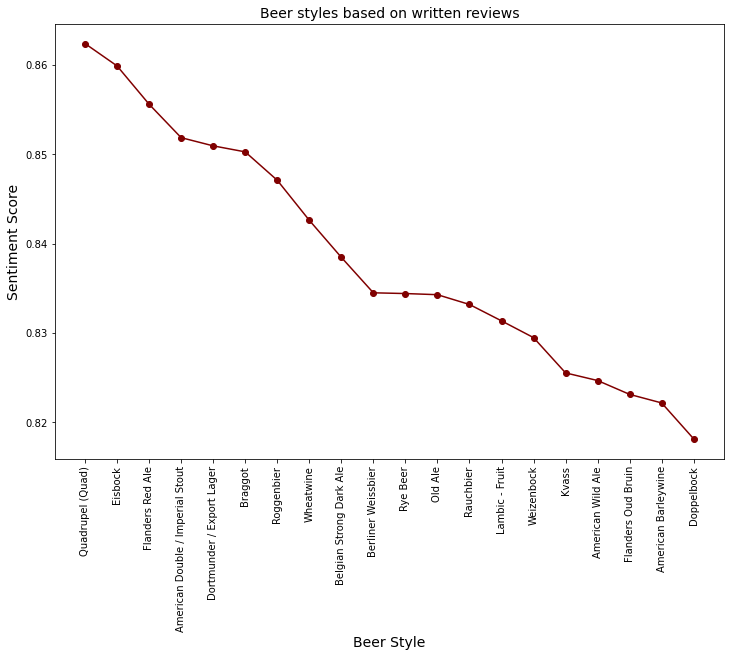

In [22]:
revs_toprated = revs.groupby('beer_style', as_index=False)['Sentiment_Score','review_overall'].mean().sort_values(by = 'Sentiment_Score',ascending = False)
print('Top 3 beer styles by customer reviews are:',list(revs_toprated.beer_style[0:3]))
print(' ')

revs_toprated10 = revs_toprated.head(20)
fig = plt.figure(figsize = (12, 8))  
plt.plot(revs_toprated10.beer_style, revs_toprated10.Sentiment_Score, color='maroon', marker='o')
plt.xlabel('Beer Style',fontsize=14) 
plt.ylabel('Sentiment Score',fontsize=14) 
plt.title('Beer styles based on written reviews',fontsize=14) 
plt.xticks(rotation=90)
plt.show() 

# Q6. How does written review compare to overall review score for the beer styles?

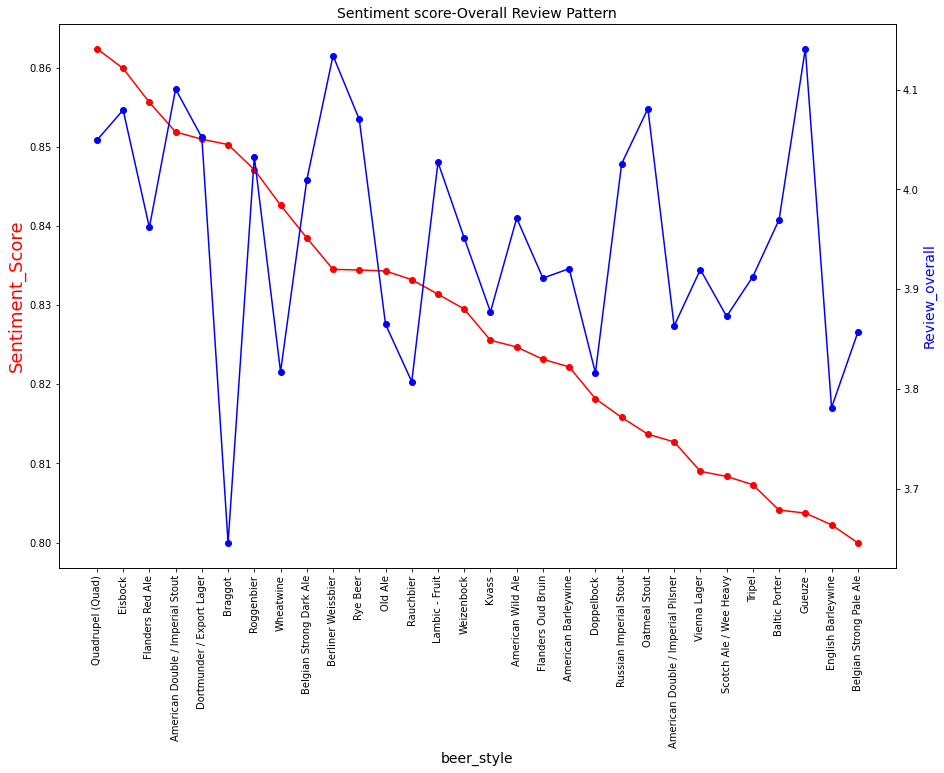

Value of ont to one correlations between overall review and sentiment score is 0.3677764693252234
 
Value of correlations between mean overall review and mean sentiment score is 0.7483623172943562
 
There is a strong correlation between Text reviews and Overall Review with a value of 0.7483623172943562 . Hence, text reviews are a strong measure of the overall reviews.


In [23]:
revs_top10 = revs_toprated.head(30)

# Plot a twin plot to understand patterns of the overall review and sentiment score data.
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(15,10))
ax.plot(revs_top10.beer_style, revs_top10.Sentiment_Score, color='red', marker='o')
ax.set_xlabel('beer_style',fontsize=14)
ax.set_ylabel('Sentiment_Score',color='red',fontsize=18)
plt.xticks(rotation=90)
plt.title('Sentiment score-Overall Review Pattern', fontsize=14)
ax.grid(False)
ax2=ax.twinx()
ax2.plot(revs_top10.beer_style, revs_top10.review_overall,color='blue',marker='o')
ax2.set_ylabel('Review_overall',color='blue',fontsize=14)
ax2.grid(False)
plt.show()
    
correlation = revs['review_overall'].corr(revs['Sentiment_Score'],'spearman')
correlations = revs_toprated['review_overall'].corr(revs_toprated['Sentiment_Score'],'spearman')
print('Value of ont to one correlations between overall review and sentiment score is',correlation)
print(' ')
print('Value of correlations between mean overall review and mean sentiment score is',correlations)
print(' ')

if correlations > 0.7:
    print('There is a strong correlation between Text reviews and Overall Review with a value of',correlations,'. Hence, text reviews are a strong measure of the overall reviews.')
elif correlations < 0.5:
    print('There is a weak correlation between Text reviews and Overall Review with a value of',correlations,'. Hence, text reviews are not a strong measure of the overall reviews.')
else:
    print('There is a moderate correlation between Text reviews and Overall Review with a value of',correlations,'. Hence, text reviews are neither a strong nor weak measure of the overall reviews.')

# Classifying Sentiments

There are 423669 Positive reviews.
There are 52377 Neutral reviews.
There are 52705 Negative reviews.
 


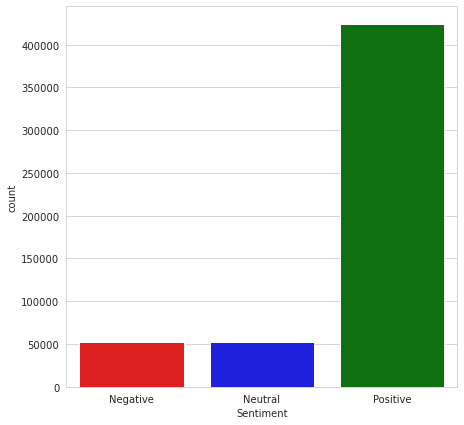

In [24]:
# Classifying text reviews based on sentiment score.
def sentimnt(revs):
    if revs['Sentiment_Score'] >= 0.7:
        val = 'Positive'
    elif revs['Sentiment_Score'] <= 0.3:
        val = 'Negative'
    else:
        val = 'Neutral'
    return val
revs['Sentiment'] = revs.apply(sentimnt, axis=1)

sents_list = ['Positive','Neutral','Negative']
for i in sents_list:
    sents = revs[revs['Sentiment'] == i]
    print('There are',sents.Sentiment.value_counts()[0],i,'reviews.')
print(' ')

plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
ax = sns.countplot(x='Sentiment', data=revs, 
                  palette=dict(Neutral='blue', Positive='Green', Negative='Red'))

# Generating a word cloud

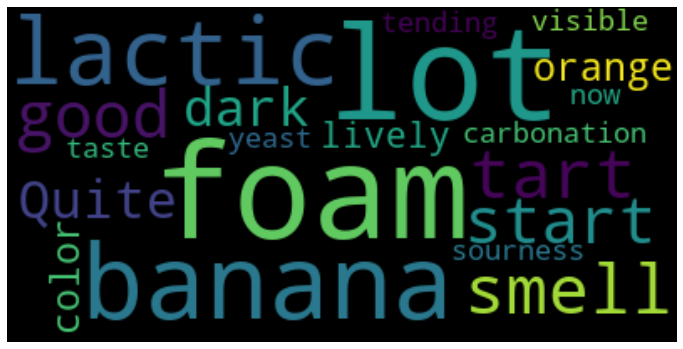

In [25]:
# Generate word cloud for first review only.

text = revs.review_textclean[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.figure(figsize=[12,8])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()